In [1]:
# Importations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from histo_starterkit.constants import DF_TRAIN_PATH, SLIDE_PATH
from histo_starterkit.utils import load_slide, load_mask, load_features, load_metadata
from histo_starterkit.utils import display_slide

In [2]:
# Load data
df = pd.read_csv(DF_TRAIN_PATH)
df.head()

,slide_name,target
0,tumor_088,1
1,tumor_101,1
2,Tumor_008,1
3,tumor_106,1
4,tumor_081,1


Slide name: tumor_088
Slide label: 1
Slide dimension: (184320, 89600)
Mask dimension: (5600, 11520)
Number of tiles: 10781
Tile size: 224
Tiling level: 17
Feature dimension: 2048


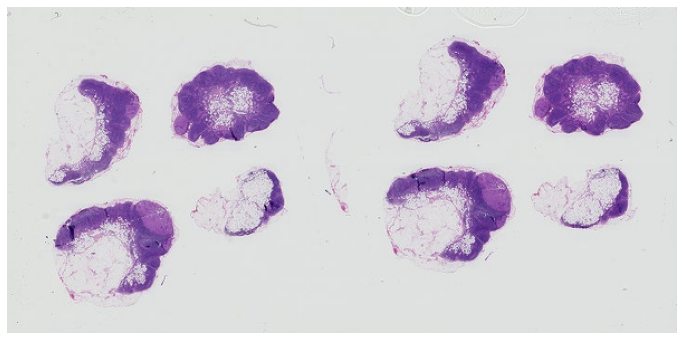

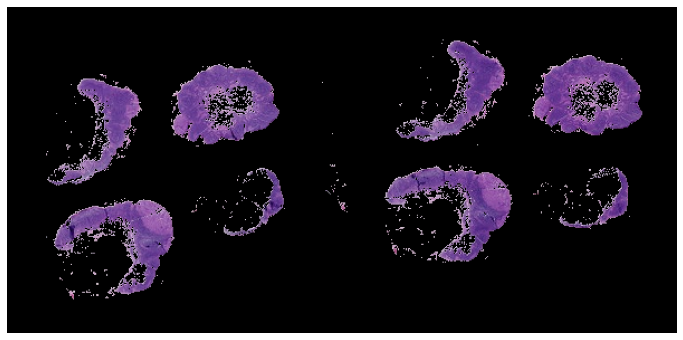

In [3]:
idx = np.random.randint(0, len(df), 1)[0]
idx = 0

row = df.iloc[idx]
slide_name, label = row.slide_name, row.target

filename = '.'.join([slide_name, 'tif'])
slide_path = os.path.join(SLIDE_PATH, filename)
slide = load_slide(slide_path)

mask = load_mask(slide_name)
features = load_features(slide_name)
metadata = load_metadata(slide_name)

tile_size, level = metadata.tile_size, metadata.level

print('Slide name:', slide_name)
print('Slide label:', label)
print('Slide dimension:', slide.dimensions)
print('Mask dimension:', mask.shape)
print('Number of tiles:', len(features))
print('Tile size:', tile_size)
print('Tiling level:', level)
print('Feature dimension:', features.shape[1]-3)

display_slide(slide)
display_slide(slide, mask=mask)